In [1]:
#Aqui subire las consultas que hice en la base de datos en BigQuery sobre test hechos a nivel nacional en EE.UU con sus respectivos positivos y negativos, hospitalizaciones, gente con ventilador, muertes, entre otros.

from google.cloud import bigquery

import pandas as pd

# Create a "Client" object
client = bigquery.Client()

dataset_ref = client.dataset("covid19_jhu_csse", project="bigquery-public-data")

dataset = client.get_dataset(dataset_ref)

In [2]:
# Aqui se pueden ver los nonmbres de las tablas de la base de datos "covid19_jhu_csse"
tables = list(client.list_tables(dataset))

# Aqui se da la orden de imprimir los nombres de las tablas
for table in tables:  
    print(table.table_id)

confirmed_cases
deaths
recovered_cases
summary


In [3]:
# Construct a reference to the "full" table
table_ref = dataset_ref.table("deaths")

# API request - fetch the table
table = client.get_table(table_ref)

In [4]:
table.schema

[SchemaField('province_or_state', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('country_or_region', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('latitude', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('longitude', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('location_geom', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_22_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_23_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_24_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_25_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_26_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_27_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_28_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_29_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_30_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_31_20',

In [5]:
import db_dtypes

client.list_rows(table, max_results=5).to_dataframe()


,province_or_state,country_or_region,latitude,longitude,location_geom,_1_22_20,_1_23_20,_1_24_20,_1_25_20,_1_26_20,...,_2_28_23,_3_1_23,_3_2_23,_3_3_23,_3_4_23,_3_5_23,_3_6_23,_3_7_23,_3_8_23,_3_9_23
0,None,Antarctica,-71.9499,23.347,POINT(-71.9499 23.347),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Northern Territory,Australia,-12.4634,130.8456,POINT(-12.4634 130.8456),0,0,0,0,0,...,90,90,90,90,90,90,90,90,90,91
2,Grand Princess,Canada,0.0,0.0,POINT(0.0 0.0),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Northwest Territories,Canada,64.8255,-124.8457,POINT(64.8255 -124.8457),0,0,0,0,0,...,22,22,22,22,22,22,22,22,22,22
4,Prince Edward Island,Canada,46.5107,-63.4168,POINT(46.5107 -63.4168),0,0,0,0,0,...,92,92,92,92,92,92,92,93,93,93


In [1]:
# Antes de comenzar con las consultas directamente a la base de datos de BigQuery, se mostrara el porque no se uso la base de datos API

#El codigo es

import requests
url = "https://api.covidtracking.com/v2/us/daily.json"
headers = {
    'cache-control': "no-cache",
    'Postman-Token': "2defb9f3-9b11-499b-be4f-82505a2f8e1a",
}
response = requests.request("GET", url)
# Cuerpo de la respuesta o "body"
print(response.text)
# Código de la respuesta
print(response)


{"links":{"self":"https://api.covidtracking.com/us/daily"},"meta":{"build_time":"2021-06-01T07:03:25.055Z","license":"CC-BY-4.0","version":"2.0-beta","field_definitions":[{"name":"Total test results","field":"tests.pcr.total","deprecated":false,"prior_names":["totalTestResults"]},{"name":"Hospital discharges","deprecated":false,"prior_names":[]},{"name":"Confirmed Cases","field":"cases.confirmed","deprecated":false,"prior_names":["positiveCasesViral"]},{"name":"Cumulative hospitalized/Ever hospitalized","field":"outcomes.hospitalized.total","deprecated":false,"prior_names":["hospitalizedCumulative"]},{"name":"Cumulative in ICU/Ever in ICU","field":"outcomes.hospitalized.in_icu","deprecated":false,"prior_names":["inIcuCumulative"]},{"name":"Cumulative on ventilator/Ever on ventilator","field":"hospitalization.on_ventilator.cumulative","deprecated":false,"prior_names":["onVentilatorCumulative"]},{"name":"Currently hospitalized/Now hospitalized","field":"hospitalization.hospitalized.curre

AttributeError: 'list' object has no attribute 'keys'

In [6]:
#Ahora ya empezaremos a hacer las consultas sql
query = """
        SELECT *
        FROM `bigquery-public-data.covid19_jhu_csse.deaths`
        WHERE country_or_region = 'Canada'
        """

In [7]:
query_job = client.query(query)

Can_Prov = query_job.to_dataframe()

In [8]:
muertoscanada_df = Can_Prov.iloc[:,5:].transpose().reset_index()



In [9]:
muertoscanada_df

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,_1_22_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,_1_23_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,_1_24_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,_1_25_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,_1_26_20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,_3_5_23,0,22,92,0,32,7,1,1882,5602,5218,825,16186,311,18131,786,2460
1139,_3_6_23,0,22,92,0,32,7,1,1890,5602,5218,834,16186,318,18132,794,2464
1140,_3_7_23,0,22,93,0,32,7,1,1890,5602,5218,834,16186,318,18144,794,2464
1141,_3_8_23,0,22,93,0,32,7,1,1890,5622,5218,834,16186,318,18153,794,2464


In [10]:
muertoscanada_df["index"]=pd.to_datetime(muertoscanada_df["index"],format='_%m_%d_%y')

In [11]:
muertoscanada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1143 non-null   datetime64[ns]
 1   0       1143 non-null   object        
 2   1       1143 non-null   object        
 3   2       1143 non-null   object        
 4   3       1143 non-null   object        
 5   4       1143 non-null   object        
 6   5       1143 non-null   object        
 7   6       1143 non-null   object        
 8   7       1143 non-null   object        
 9   8       1143 non-null   object        
 10  9       1143 non-null   object        
 11  10      1143 non-null   object        
 12  11      1143 non-null   object        
 13  12      1143 non-null   object        
 14  13      1143 non-null   object        
 15  14      1143 non-null   object        
 16  15      1143 non-null   object        
dtypes: datetime64[ns](1), object(16)
memory usage: 151.9

In [12]:
muertoscanada_df[[0 , 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]=muertoscanada_df[[0 , 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]].astype(int)
muertoscanada_df['total'] = muertoscanada_df.iloc[:, 1:].sum(axis=1)

muertoscanada_df

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,total
0,2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,2023-03-05,0,22,92,0,32,7,1,1882,5602,5218,825,16186,311,18131,786,2460,51555
1139,2023-03-06,0,22,92,0,32,7,1,1890,5602,5218,834,16186,318,18132,794,2464,51592
1140,2023-03-07,0,22,93,0,32,7,1,1890,5602,5218,834,16186,318,18144,794,2464,51605
1141,2023-03-08,0,22,93,0,32,7,1,1890,5622,5218,834,16186,318,18153,794,2464,51634


In [13]:
muertoscanada_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1143 non-null   datetime64[ns]
 1   0       1143 non-null   int32         
 2   1       1143 non-null   int32         
 3   2       1143 non-null   int32         
 4   3       1143 non-null   int32         
 5   4       1143 non-null   int32         
 6   5       1143 non-null   int32         
 7   6       1143 non-null   int32         
 8   7       1143 non-null   int32         
 9   8       1143 non-null   int32         
 10  9       1143 non-null   int32         
 11  10      1143 non-null   int32         
 12  11      1143 non-null   int32         
 13  12      1143 non-null   int32         
 14  13      1143 non-null   int32         
 15  14      1143 non-null   int32         
 16  15      1143 non-null   int32         
 17  total   1143 non-null   int64         
dtypes: datet

In [14]:
muertoscanada_df_final=muertoscanada_df[["index","total"]]
muertoscanada_df_final

,index,total
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,51555
1139,2023-03-06,51592
1140,2023-03-07,51605
1141,2023-03-08,51634


In [15]:
print(muertoscanada_df_final.columns)


Index(['index', 'total'], dtype='object')


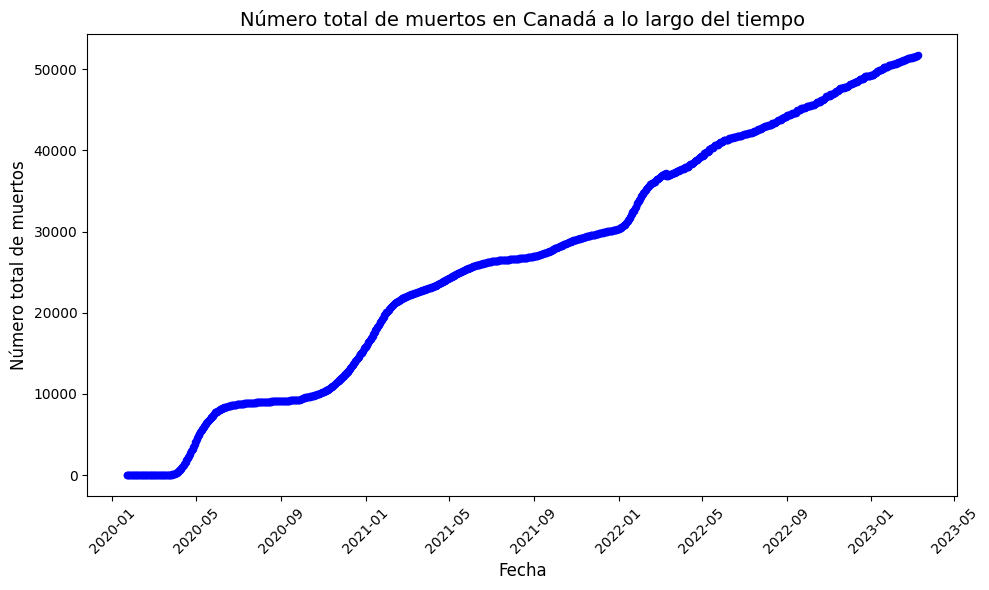

In [32]:
import matplotlib.pyplot as plt

# Graficar los datos como un gráfico de dispersión
muertoscanada_df_final.plot.scatter(x='index', y='total', figsize=(10, 6), color='blue')

# Etiquetas y título
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Número total de muertos', fontsize=12)
plt.title('Número total de muertos en Canadá a lo largo del tiempo', fontsize=14)

# Ajustes de la visualización
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


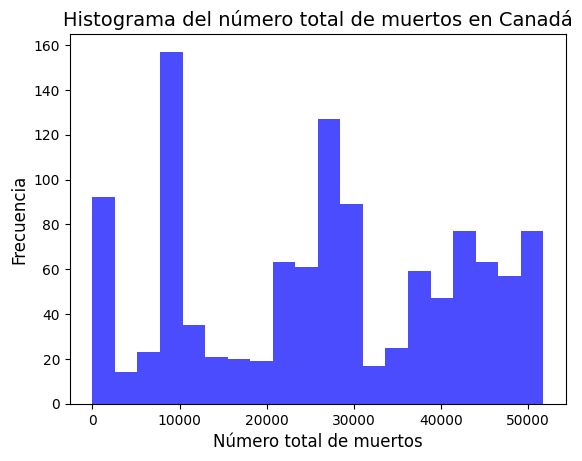

In [33]:
import matplotlib.pyplot as plt

# Graficar el histograma
plt.hist(muertoscanada_df_final['total'], bins=20, color='blue', alpha=0.7)

# Etiquetas y título
plt.xlabel('Número total de muertos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Histograma del número total de muertos en Canadá', fontsize=14)

# Mostrar el gráfico
plt.show()


In [36]:
# Ahora realizamos una segunda consulta a otra tabla
table_ref = dataset_ref.table("confirmed_cases")

# API request - fetch the table
table = client.get_table(table_ref)

In [37]:
table.schema

[SchemaField('province_or_state', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('country_or_region', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('latitude', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('longitude', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('location_geom', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_22_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_23_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_24_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_25_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_26_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_27_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_28_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_29_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_30_20', 'STRING', 'NULLABLE', None, '', (), None),
 SchemaField('_1_31_20',

In [38]:
import db_dtypes

client.list_rows(table, max_results=5).to_dataframe()

,province_or_state,country_or_region,latitude,longitude,location_geom,_1_22_20,_1_23_20,_1_24_20,_1_25_20,_1_26_20,...,_2_28_23,_3_1_23,_3_2_23,_3_3_23,_3_4_23,_3_5_23,_3_6_23,_3_7_23,_3_8_23,_3_9_23
0,None,Antarctica,-71.9499,23.347,POINT(-71.9499 23.347),0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
1,Diamond Princess,Canada,0.0,0.0,POINT(0.0 0.0),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,None,"Korea, North",40.3399,127.5101,POINT(40.3399 127.5101),0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,None,Nauru,-0.5228,166.9315,POINT(-0.5228 166.9315),0,0,0,0,0,...,5247,5247,5247,5247,5247,5247,5247,5247,5247,5247
4,Niue,New Zealand,-19.0544,-169.8672,POINT(-19.0544 -169.8672),0,0,0,0,0,...,788,790,790,790,790,790,791,791,791,792


In [105]:
#Ahora ya empezaremos a hacer las consultas sql
query = """
        SELECT *
        FROM `bigquery-public-data.covid19_jhu_csse.deaths`
        WHERE country_or_region = 'New Zealand'
        """

In [106]:
query_job = client.query(query)

New_prov = query_job.to_dataframe()

In [107]:
casosNew_df = New_prov.iloc[:,5:].transpose().reset_index()

In [108]:
casosNew_df

,index,0,1,2
0,_1_22_20,0,0,0
1,_1_23_20,0,0,0
2,_1_24_20,0,0,0
3,_1_25_20,0,0,0
4,_1_26_20,0,0,0
...,...,...,...,...
1138,_3_5_23,2,0,2548
1139,_3_6_23,2,0,2548
1140,_3_7_23,2,0,2548
1141,_3_8_23,2,0,2548


In [109]:
casosNew_df["index"]=pd.to_datetime(casosNew_df["index"],format='_%m_%d_%y')

In [110]:
casosNew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1143 non-null   datetime64[ns]
 1   0       1143 non-null   object        
 2   1       1143 non-null   object        
 3   2       1143 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 35.8+ KB


In [112]:
casosNew_df[[0 , 1,2]]=casosNew_df[[0 , 1,2]].astype(int)
casosNew_df['total'] = casosNew_df.iloc[:, 1:].sum(axis=1)

casosNew_df

,index,0,1,2,total
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
1138,2023-03-05,2,0,2548,2550
1139,2023-03-06,2,0,2548,2550
1140,2023-03-07,2,0,2548,2550
1141,2023-03-08,2,0,2548,2550


In [113]:
casosNew_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1143 non-null   datetime64[ns]
 1   0       1143 non-null   int32         
 2   1       1143 non-null   int32         
 3   2       1143 non-null   int32         
 4   total   1143 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 31.4 KB


In [123]:
casosNew_df_final=casosNew_df[["index","total"]]
casosNew_df_final

,index,total
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
1138,2023-03-05,2550
1139,2023-03-06,2550
1140,2023-03-07,2550
1141,2023-03-08,2550


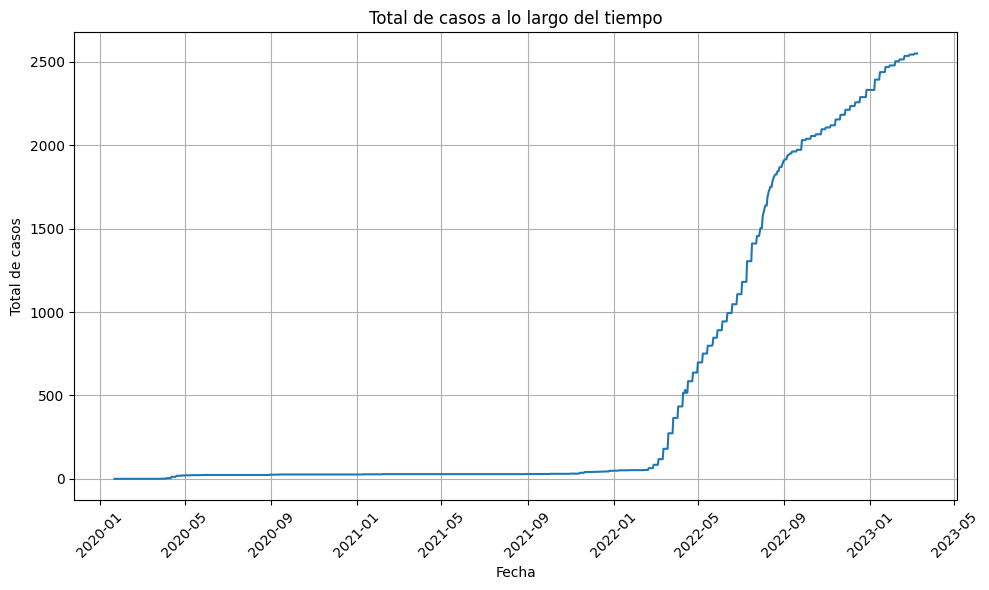

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(casosNew_df_final["index"], casosNew_df_final["total"])
plt.title("Total de casos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de casos")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


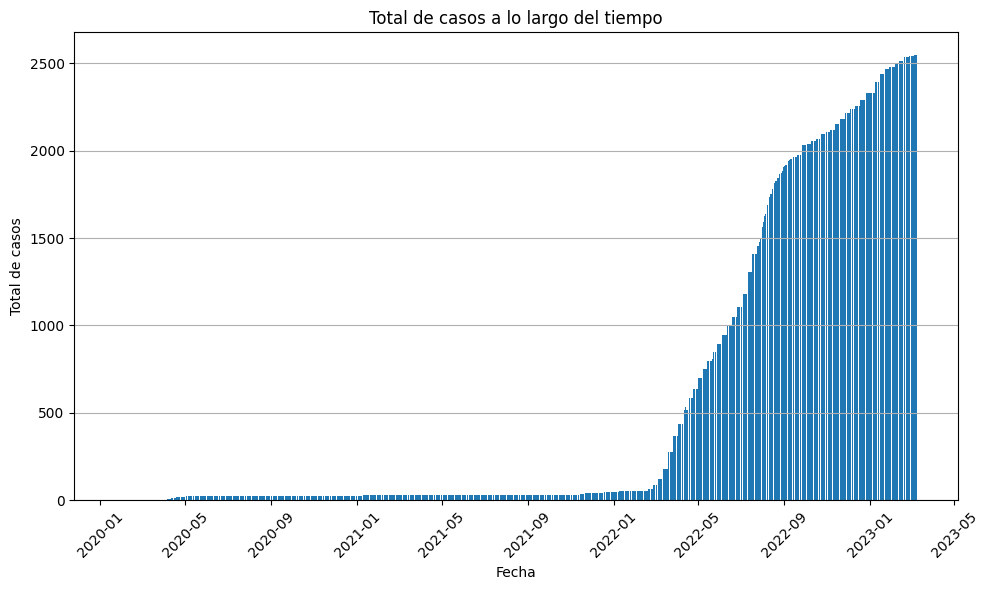

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(casosNew_df_final["index"], casosNew_df_final["total"])
plt.title("Total de casos a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Total de casos")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


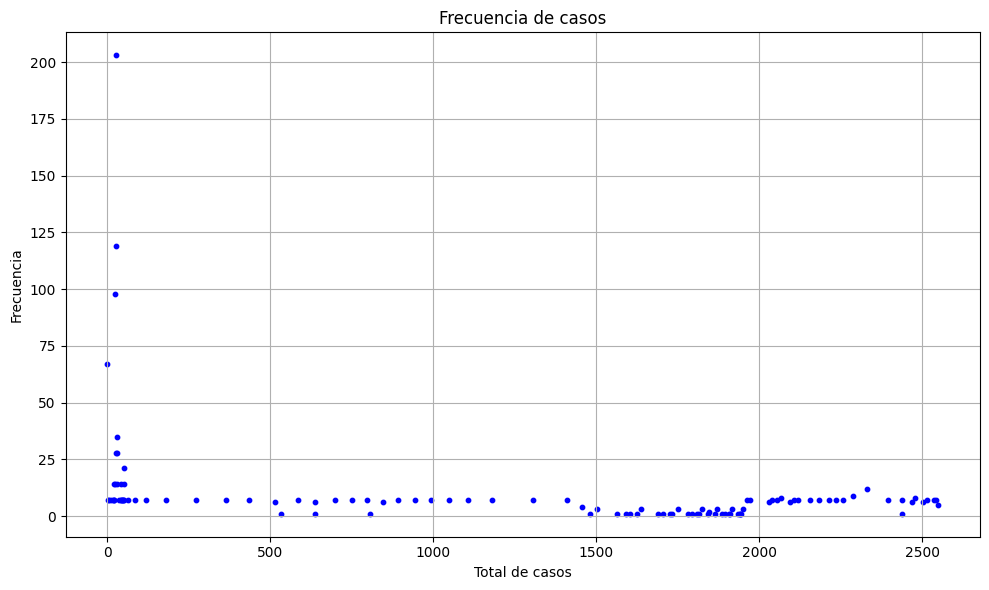

In [152]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de los casos
frecuencia_por_casos = casosNew_df_final["total"].value_counts().reset_index()
frecuencia_por_casos.columns = ["Total de casos", "Frecuencia"]

# Crear el gráfico de puntos
plt.figure(figsize=(10, 6))
plt.scatter(frecuencia_por_casos["Total de casos"], frecuencia_por_casos["Frecuencia"], color='blue', s=10)
plt.title("Frecuencia de casos")
plt.xlabel("Total de casos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.tight_layout()
plt.show()
